In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Read input image
image = cv2.imread('/content/1.jpg')

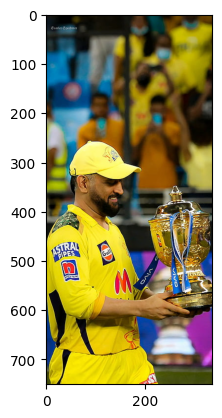

In [ ]:
# Convert image to RGB (OpenCV reads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.show()

<ipython-input-4-f0574ecb1252>:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image_rgb)
<ipython-input-4-f0574ecb1252>:6: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


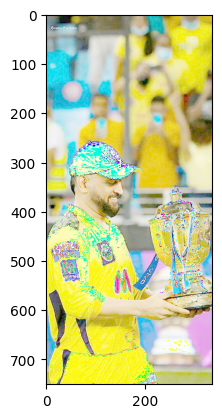

In [ ]:
# Applying log transform
c = 255/(np.log(1 + np.max(image_rgb)))
log_transformed = c * np.log(1 + image_rgb)

# Specifing the data type
log_transformed = np.array(log_transformed, dtype = np.uint8)

plt.imshow(log_transformed)
plt.show()

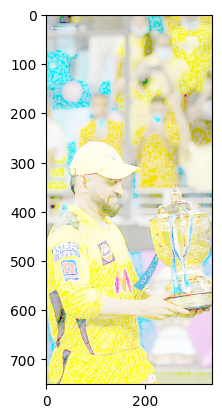

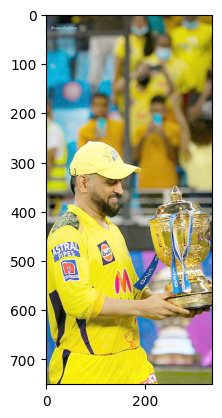

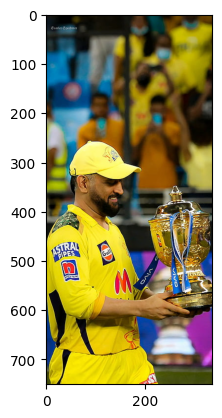

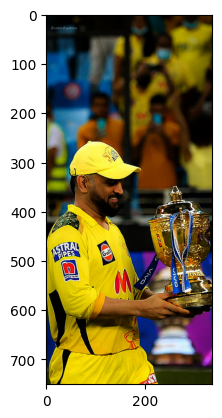

In [ ]:
for gamma in [0.1, 0.5, 1.0, 1.5]:
  # Applying power law transform
  # Applying gamma correction
  gamma_corrected = np.array(255*(image_rgb / 255) ** gamma, dtype = 'uint8')
  gamma_corrected = np.array(gamma_corrected, dtype = np.uint8)
  plt.imshow(gamma_corrected)
  plt.show()

In [ ]:
#image masking
def convolve_2d(image_rgb, kernel):
    # Padding the image with zeros to handle the edges
    padded_image = [[0 for _ in range(len(image_rgb[0]) + 2)] for _ in range(len(image_rgb) + 2)]
    for i in range(len(image_rgb)):
        for j in range(len(image_rgb[0])):
            padded_image[i + 1][j + 1] = image_rgb[i][j]

    # Dimensions of the image and kernel
    image_height = len(padded_image)
    image_width = len(padded_image[0])
    kernel_height = len(kernel)
    kernel_width = len(kernel[0])

    # Dimensions of the output image
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Initialize the output image with zeros
    output_image = [[0 for _ in range(output_width)] for _ in range(output_height)]

    # Apply the convolution operation
    for i in range(output_height):
        for j in range(output_width):
            sum = 0
            for ki in range(kernel_height):
                for kj in range(kernel_width):
                    sum += padded_image[i + ki][j + kj] * kernel[ki][kj]
            output_image[i][j] = sum

    return output_image

In [ ]:
# Example usage
image = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

kernel = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]

convolved_image = convolve_2d(image, kernel)

# Print the convolved image
for row in convolved_image:
    print(row)

[12, 21, 16]
[27, 45, 33]
[24, 39, 28]


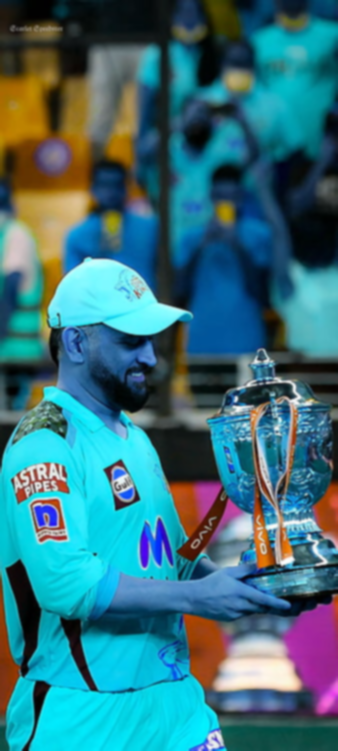

In [ ]:
# Apply Gaussian blur for noise reduction
denoised_img = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display denoised image
cv2_imshow(denoised_img)

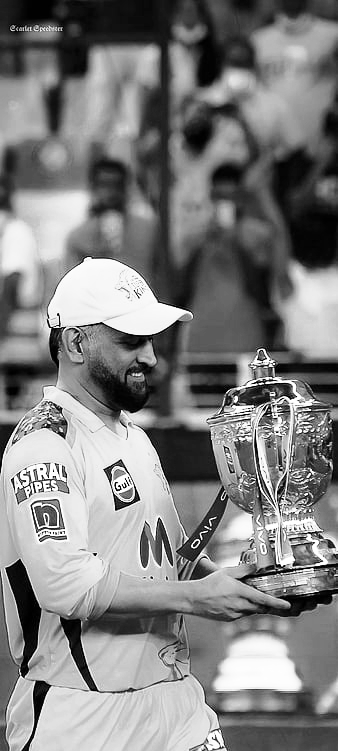

In [ ]:
# Convert image to grayscale
gray_img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization for contrast enhancement
enhanced_img = cv2.equalizeHist(gray_img)

# Display enhanced image
cv2_imshow(enhanced_img)
cv2.waitKey(0)
cv2.destroyAllWindows()